In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics


df1 = pd.read_csv('university_rank_2020.csv', index_col='University')
df2 = pd.read_csv('university_rank_other.csv', delim_whitespace=True)
df3 = pd.read_excel('university_rank_students.xlsx', index_col='University')
df3.to_csv('csvfile.csv', encoding='utf-8')

df = pd.concat([df1, df2, df3], axis=1)

In [2]:
print('Rows:', df.shape[0], 'Columns:', df.shape[1])
print(df.dtypes)
print(df.head(10))
print(df.isnull().sum())

Rows: 1396 Columns: 13
Country                       object
Number_students              float64
Numb_students_per_Staff      float64
Score_Result                 float64
Rank                           int64
Teaching                     float64
Research                     float64
Citations                    float64
Industry_Income              float64
International_Outlook         object
International_Students(%)    float64
Percentage_Female(%)         float64
Percentage_Male(%)           float64
dtype: object
                                              Country  Number_students  \
University of Oxford                   United Kingdom           20.664   
California Institute of Technology      United States            2.240   
University of Cambridge                United Kingdom           18.978   
Stanford University                     United States           16.135   
Massachusetts Institute of Technology   United States           11.247   
Princeton University                  

In [3]:
numeric_columns = df.select_dtypes(include=['number']).columns

imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(df[numeric_columns])
df[numeric_columns] = imp.transform(df[numeric_columns])

print(df.isnull().sum())

Country                       0
Number_students               0
Numb_students_per_Staff       0
Score_Result                  0
Rank                          0
Teaching                      0
Research                      0
Citations                     0
Industry_Income               0
International_Outlook        11
International_Students(%)     0
Percentage_Female(%)          0
Percentage_Male(%)            0
dtype: int64


In [1]:
categorical_columns = df.select_dtypes(include=['object']).columns

imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
imp = imp.fit(df[categorical_columns])
df[categorical_columns] = imp.transform(df[categorical_columns])

print(df.isnull().sum())

NameError: name 'df' is not defined

In [5]:
df.to_csv('university_rank_no_nan.csv', sep=',', decimal=".", encoding='utf-8')

In [6]:
inputData = df.columns.tolist()
outputData = df.columns[9]
inputData.remove(outputData)

inputData.remove('Country')

X_train, X_test, y_train, y_test = train_test_split(df[inputData], df[outputData], test_size=0.3, random_state=789)

In [7]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(977, 11) (419, 11) (977,) (419,)


In [8]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('First four predicted values:', y_pred[:4])
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

First four predicted values: ['bad' 'bad' 'good' 'bad']
Accuracy: 0.9952267303102625


In [9]:
print('Precision:', metrics.precision_score(y_test, y_pred, average=None)) # Za vsak razred izpiše precision
print('Recall:', metrics.recall_score(y_test, y_pred, average=None)) # Za vsak razred izpiše recall
print('F1-score:', metrics.f1_score(y_test, y_pred, average=None)) # Za vsak razred izpiše F1-score

Precision: [1.         0.94736842 0.99621212]
Recall: [1.         0.94736842 0.99621212]
F1-score: [1.         0.94736842 0.99621212]


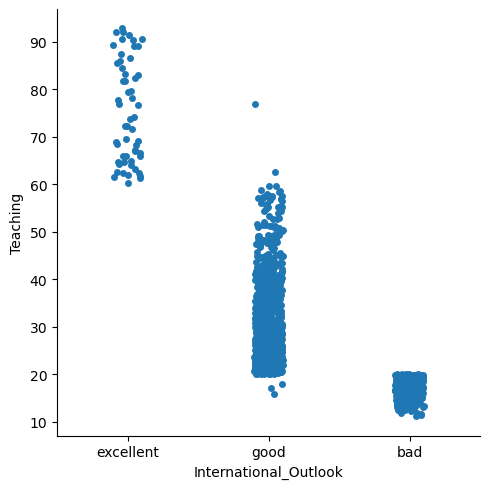

In [10]:
sns.catplot(data=df, x="International_Outlook", y="Teaching")

In [11]:
inputData.remove('Teaching')
X_train, X_test, y_train, y_test = train_test_split(df[inputData], df[outputData], test_size=0.3, random_state=789)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('First four predicted values:', y_pred[:4])
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

(977, 10) (419, 10) (977,) (419,)
First four predicted values: ['bad' 'bad' 'good' 'bad']
Accuracy: 0.7828162291169452


In [12]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, \
    GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression

classifiers = [
    DecisionTreeClassifier(),
    LogisticRegression(max_iter=10000),
    LinearSVC(),
    KNeighborsClassifier(),
    GaussianNB(),
    RandomForestClassifier(),
    ExtraTreesClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier()
]

In [13]:
from matplotlib import rcParams
from sklearn.model_selection import cross_val_score, StratifiedKFold

inputData = df.columns.tolist()
inputData.remove('Country')
inputData.remove(outputData)

results = []
for classifier in classifiers:
    k_fold = StratifiedKFold(n_splits=8, random_state=123, shuffle=True)
    cv_results = cross_val_score(classifier,
                                 df[inputData],
                                 df[outputData],
                                 cv=k_fold,
                                 scoring='accuracy'
                                 )
    print(f'{type(classifier).__name__ :>30}: {cv_results.mean():1.4f}')
    results.append([type(classifier).__name__, cv_results.mean()])

        DecisionTreeClassifier: 0.9950
            LogisticRegression: 0.9828


/Users/gregorsulcer/.conda/envs/tz3/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gregorsulcer/.conda/envs/tz3/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gregorsulcer/.conda/envs/tz3/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gregorsulcer/.conda/envs/tz3/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gregorsulcer/.conda/envs/tz3/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/gregorsulcer/.conda/env

                     LinearSVC: 0.8954
          KNeighborsClassifier: 0.8582
                    GaussianNB: 0.8453
        RandomForestClassifier: 0.9928
          ExtraTreesClassifier: 0.9678
            AdaBoostClassifier: 0.9928
    GradientBoostingClassifier: 0.9957


In [14]:
print(results)

[['DecisionTreeClassifier', 0.9949835796387521], ['LogisticRegression', 0.982816091954023], ['LinearSVC', 0.8954351395730706], ['KNeighborsClassifier', 0.8582101806239737], ['GaussianNB', 0.845287356321839], ['RandomForestClassifier', 0.9928325123152709], ['ExtraTreesClassifier', 0.9677545155993432], ['AdaBoostClassifier', 0.9928325123152709], ['GradientBoostingClassifier', 0.9957019704433498]]


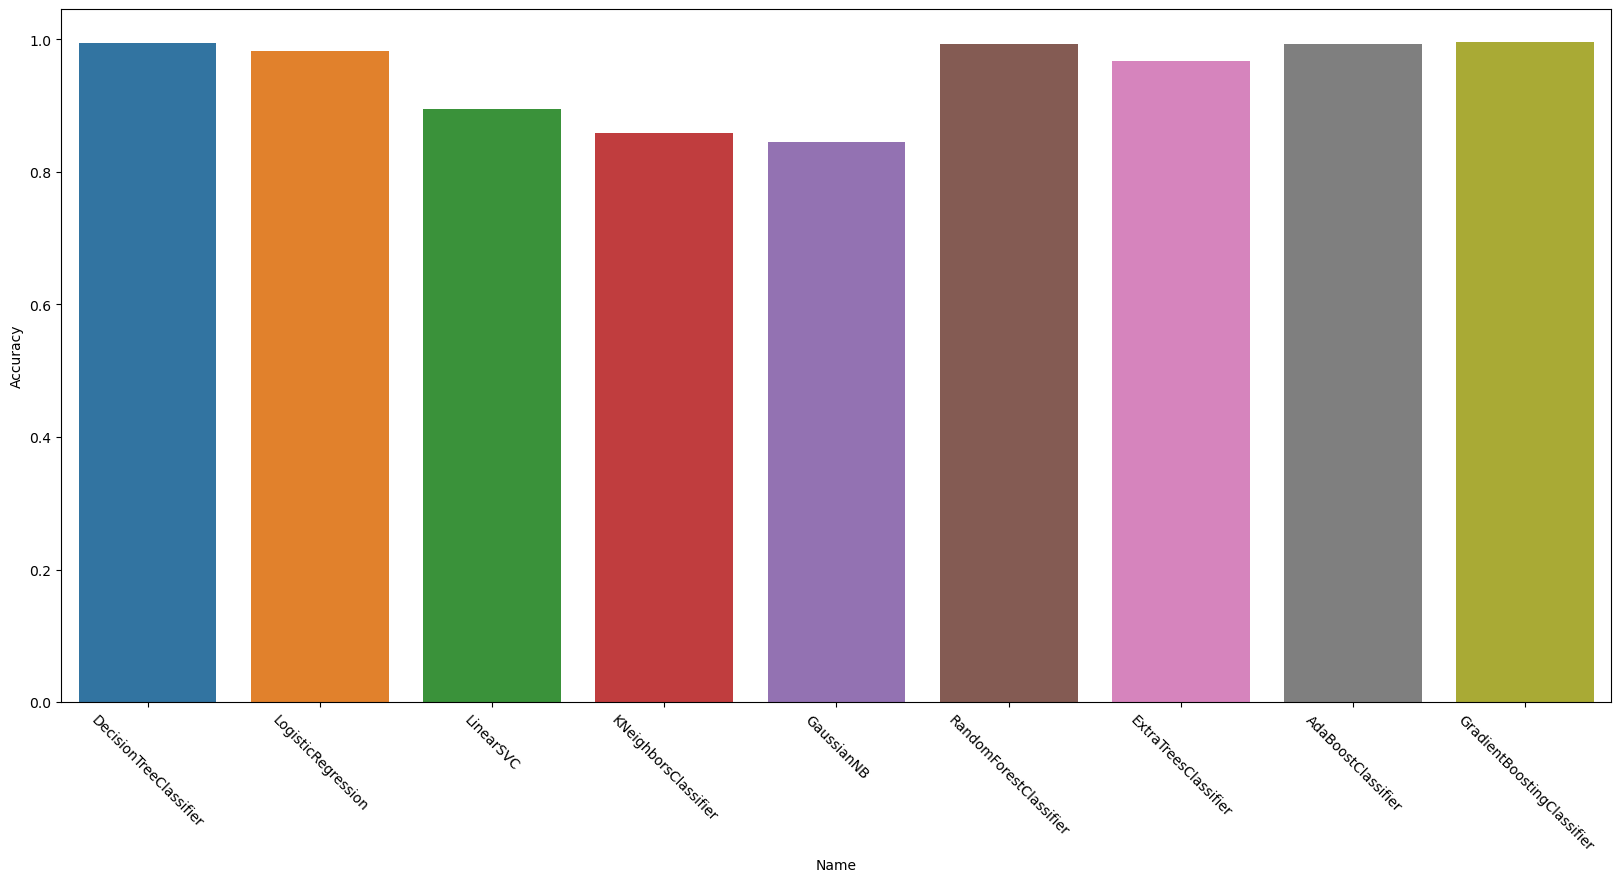

In [15]:
df_result = pd.DataFrame(results, columns=['Name', 'Accuracy'])

rcParams['figure.figsize'] = 20, 9

plot = sns.barplot(data=df_result, x="Name", y="Accuracy")
plot.tick_params(axis='x', rotation=-45)